<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/main/Solving_Differential_Equations_with_NNs/01_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 1: Solving Differential Equations Numerically

## What is a Differential Equation and Why are They Important in Physics?

A differential equation is an equation that relates an unknown function to its derivatives (or possibly to just some constants).  The following are examples of differential equations:
$$y'' - 2y' = cos(y)$$
$$\frac{d^2y}{dt^2} = -3y$$
$$\frac{dy}{dx} = 7$$

Solving a differential equations means finding an equation for the original function (y in the above examples) such that the differential equation is satisfied.  Solving differential equations is a large area of mathematics.  You can learn more about how to solve differential equations at the resources linked at the bottom of this notebook.  This notebook, however, will focus on ways to solve differential equations computationally (using _numerical methods_).


### Classification of Differential Equations
There are several ways to classify differential equations (which can be read about in the references), but we only need to discuss on of the methods here.  A differential equation is said to be of the n-th order if the highest order derivative in the differential equation is to the n-th order.  For example $y''+y' = 2y$ is a second order differential equation, $\frac{dy}{dx} = y$ is a first order differential equation, and $y^{(3)} + y^{(5)} = 2y$ is a 5th order differential equation.

Differential equations of many orders are important in physics, but this module will focus only on second order differential equations (meaning the highest order derivative will be to the second order).  These second order differential equations are found in equations for acceleration ($a(t) = \frac{d^2y}{dt^2}$) in classical mechanics and in Schrodinger's equation in quantum mechanics, for example.

## Numerical Methods for Solving Differential Equations

Numerical methods are algorithms which allow mathematical problems to be solved approximately, but in a method that can be easily programmed. Numerically solving differential equations can be a bit tricky because the solution to a differential equation should be a continuous function, but computers can only solve problems in a discretized manner.  Therefore, we have to employ numerical methods which can solve these equations in a discretized manner.  Note that this means that we will get the solution of our differential equation only at certain points, instead of a continuous solution as you would get from solving analytically, but numerical solvers can easily handle equations that would be difficult or impossible to solve analytically.

This section of the notebook will discuss four numerical methods for solving second order differential equations.  They are arranged below in order of increasing accuracy.  Each of the below methods will assume that the equation for the second order differential equation is known, and they will solving for the first order derivative as well as the original equation.

### An Introduction to Discretization for Numerical Methods

Let's assume that we know the equation for the velocity of an object as a function of time, v(t), and we want to find the position of that object with respect to time.  Analytically, we know that the velocity of an object is just the derivative of the position with respect to time:
$$v(t) = \frac{dy(t)}{dt},$$ which means that we can find the position function analytically by simply integrating the velocity equation: $$y(t) = \int_{t_{initial}}^{t_{final}} v(t)dt.$$

However, when solving for the position function analytically, we have to take a different approach to discretize all of the variables.  Assuming we are only taking a very small time step, we can rewrite the derivative for velocity in an approximate form: $$v(t) = \frac{dy(t)}{dt} \approx \frac{\Delta y}{\Delta t}.$$

Here we have used the variable $\Delta t$, which is known as the time step.  We can define the time step as: $$\Delta t = \frac{t_{final}-t_{initial}}{n},$$ where n is the number of points we wish to solve for position at.

We can expand our approximate equation for velocity as: $$v(t) \approx \frac{\Delta y}{\Delta t} = \frac{y(t+\Delta t) - y(t)}{\Delta t}.$$

Now we can solve the above equation to get an equation for the position (removing the approximation, especially for $\Delta t$ $\approx$ 0): $$y(t+\Delta t) = y(t) + v(t)\Delta t.$$

From here we need to introduce a notation for discretized variables.  First for time.  We can say that the time at the ith point we are performing the calculation at can be written as: $$t \longrightarrow t_i = t_{initial} + i\Delta t,$$ for i = 0, 1, ..., n.  From  here we can also define discretized forms of our position and velocity equations using the same notation: $$y(t) \longrightarrow y(t_i) = y_i$$ $$v(t) \longrightarrow v(t_i) = v_i$$

We also need to introduce the following notation for a position or velocity that is one time step ahead of or behind the ith point:
$$y_{i\pm1} = y(t_i \pm \Delta t)$$ $$v_{i\pm1} = v(t_i \pm \Delta t)$$

Now, combining all of this together, we can write an equation for the position of the object in discretized form: $$y_{i+1} = y_i + v_i\Delta t.$$. So, given an equation for the velocity of a system, the time step, and the initial conditions (starting position and velocity) we can solve for the position at any time step:
$$y_1 = y_0 + v_0\Delta t$$
$$y_2 = y_1 + v_1\Delta t$$
$$y_3 = y_2 + v_2\Delta t$$
$$...$$

Note that the smaller the time step is the more accurate the solution to the differential equation will be, but this will also increase computational time.  Solving differential equations numerically can involve finding a balance between accuracy and run time.

### Euler's Method
Euler's method is one of the simplest methods for solving second order differential equations, but it also has the largest error, with the error being proportional to the step size.  This does mean, however, that the error of the method can be decreased by decreasing the time step.

Using acceleration as an example of a second order differential equation (with velocity being the first order differential equation and position being the original function), we can represent Euler's method in equation form as:
$$v_{i+1} = v_i + a_i\Delta t,$$ and $$y_{i+1} = y_i + v_i\Delta t.$$ 

We can also computationally represent Euler's method with a skeleton code as:

```python
import numpy as np
import matplotlib.pyplot as plt
# Add any other needed imports here

# Add any needed set-up code here

DeltaT = 0.01 # The smaller the better for DeltaT

#set up arrays 
tfinal = 0.5 # Or whatever final time is needed
n = ceil(tfinal/DeltaT) #Assuming tinitial=0

# set up arrays for t, a, v, and y and we can compare our results with analytical ones
t = np.zeros(n)
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)

# Initial conditions (Change these if needed)
v[0] = 0.0  #m/s
y[0] = 10.0 #m

# Start integrating using Euler's method
for i in range(n-1):
    # expression for acceleration
    a[i] = # Add code here
    # update velocity and position
    y[i+1] = y[i] + DeltaT*v[i]
    v[i+1] = v[i] + DeltaT*a[i]
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    
# Compute the acceleration at the final time step
a[n-1] = # Add code here

```

Note that even though this example uses acceleration, velocity, and position, Euler's method (and all other numerical methods shown in this notebook) can be used to solve any second order differential equation.  Also note that the code example above assumes that acceleration, velocity, and acceleration will be one dimensional quantities.  This code can easily be adapted to handle two or even three dimensional data simply by changing how the data arrays are set up.  Instead of 
```python
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)
```

use 

```python
a = np.zeros((n,2))
v = np.zeros((n,2))
y = np.zeros((n,2))
```
for a two dimensional data set, or

```python
a = np.zeros((n,3))
v = np.zeros((n,3))
y = np.zeros((n,3))
```

for a three dimensional data set.

### The Euler-Cromer Method

The Euler-Cromer method is a slight variation on Euler's method.  The difference is that the position is calculated using the velocity at the current time step instead of the previous time step.  The error on the Euler-Cromer method is proportional to $\Delta t$ the same as for the Euler's method, but there is an important difference between the two methods.  Euler's method is known as an _energy increasing method_.  This means that, in general, the further a calculated point is from the starting point the less accurate it is.  However, the Euler-Cromer method is known as a _stable method_, meaning that the long range points will be as accurate as the close range ones.  This makes Euler-Cromer a better choice than Euler's method when solving a differential equation over a wide range.

We can represent Euler-Cromer method in equation form as:
$$v_{i+1} = v_i + a_i\Delta t,$$ and $$y_{i+1} = y_i + v_{i+1}\Delta t.$$ 

We can also computationally represent Euler's method with a skeleton code as:

```python
import numpy as np
import matplotlib.pyplot as plt
# Add any other needed imports here

# Add any needed set-up code here

DeltaT = 0.01 # The smaller the better for DeltaT

#set up arrays 
tfinal = 0.5 # Or whatever final time is needed
n = ceil(tfinal/DeltaT) #Assuming tinitial=0

# set up arrays for t, a, v, and y and we can compare our results with analytical ones
t = np.zeros(n)
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)

# Initial conditions (Change these if needed)
v[0] = 0.0  #m/s
y[0] = 10.0 #m

# Start integrating using Euler-Cromer
for i in range(n-1):
    # expression for acceleration
    a[i] = # Add code here
    # update velocity and position
    v[i+1] = v[i] + DeltaT*a[i]
    y[i+1] = y[i] + DeltaT*v[i+1]
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    
# Compute the acceleration at the final time step
a[n-1] = # Add code here

```

Note that with Euler's method it does not matter if you calculate the velocity before the position, but for Euler-Cromer, since the position depends on the velocity at the current time step, the Euler-Cromer velocity must be calculated before the position.



### The Velocity-Verlet Method

The final numerical differential equation solver we will look at in detail is called the Velocity-Verlet method.  It is a bit more complicated than the previous two methods, but it does have some major advantages.  The error for the Velocity-Verlet method is proportional to $\Delta t^3$, compared to the previous two method which had an error proportional to $\Delta t$ ($\Delta t^3 < \Delta t$ for $\Delta t < 1$).  Velocity-Verlet is a stable method like Euler-Cromer, meaning that it will conserve the energy of the system, even when calculating over a longer time range.

We can represent the Velocity-Verlet method in equation form as: $$x_{i+1} = x_i + v_i\Delta t + \frac{1}{2}a_i\Delta t^2$$ $$v_{i+1} = v_i + \frac{1}{2}\Delta t (a_{i+1} + a_i),$$

and in computational form as:
```python
import numpy as np
import matplotlib.pyplot as plt
# Add any other needed imports here

# Add any needed set-up code here

DeltaT = 0.01 # The smaller the better for DeltaT

#set up arrays 
tfinal = 0.5 # Or whatever final time is needed
n = ceil(tfinal/DeltaT) #Assuming tinitial=0

# set up arrays for t, a, v, and y and we can compare our results with analytical ones
t = np.zeros(n)
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)

# Initial conditions (Change these if needed)
v[0] = 0.0  #m/s
y[0] = 10.0 #m

# Start integrating using Euler-Cromer
for i in range(n-1):
    # expression for acceleration
    a[i] = # Add code here
    # update position
    y[i+1] = y[i] + v[i]*DeltaT + 0.5*a[i]*DeltaT**2
    # updated expression for acceleration
    a[i+1] = #Add code here
    # update velocity
    v[i+1] = v[i] + 0.5*DeltaT*(a[i+1] + a[i])
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    


```





### Advanced Numerical Methods

There are more advanced numerical methods for solving differential equations as well.  These methods tend to be harder to implement by hand but are much more accurate than the methods detailed above.  For example, a popular numerical differential equation solver [Runge Kutta](https://mathworld.wolfram.com/Runge-KuttaMethod.html) to the fourth order has an error that is proportional to $\Delta t^5$, significantly smaller than the above methods.

To use these more advanced numerical differential equation solvers, it is common to use an implementation provided by a common code library.  For example, in Python the library [SciPy](https://docs.scipy.org/doc/scipy/index.html) provides a wide range of numerical differential equation solvers which can be viewed [here](https://docs.scipy.org/doc/scipy/reference/integrate.html).  You can find plenty of examples of how to use these solver, [here](https://docs.scipy.org/doc/scipy/tutorial/integrate.html#ordinary-differential-equations-solve-ivp) among other places.

For the remainder of this module we will only use three simple numerical differential equation solvers described above (Euler's, Euler-Cromer, and Velocity-Verlet), though it is useful for further studies of these topics to know how more advanced numerical differential equation solvers work.





## Example Problem: Freefall with Drag

### Problem Set-Up

Suggested background reading: Sections 2.1 and 2.2 from _Classical Mechanics_ by John R. Taylor.

Let's assume that an object (m=1.0kg) has been released at some height above the surface of the Earth.  As the object falls it is subject to the force of Earth's gravity pulling it downwards but also linear air resistance acting against the direction of motion (upwards in this case).

![Force Diagram](https://raw.githubusercontent.com/GDS-Education-Community-of-Practice/DSECOP/main/Solving_Differential_Equations_with_NNs/Force.png)

We can define the following equations for the forces acting on the object.  For the force due to Earth's gravity:

$$\vec{F}_g = m\vec{g},$$

where

$$\vec{g} = \langle 0,-9.81\rangle \frac{m}{s^2}$$.

For linear air resistance, we can define the force as being proportional to the object's velocity:

$$\vec{F}_{drag} = -b\vec{v},$$

where b is a constant that depends on the objects shape, but is typically much less than 1.

Therefore, we can define the net force on the object in vector form as:

$$\vec{F}_{net} = \vec{F}_g + \vec{F}_{drag} = m\vec{g} - b\vec{v}.$$

Since we are only interested in modelling the height of the object, we can restrict the net force equation to just the y-direction:

$$F_{net,y} = mg-bv_y,$$

where g as been redefined to be g = -9.81$\frac{m}{s^2}$.

Using Newton's second law (F=ma), we can define the acceleration of the object as:

$$a_y = \frac{F_{net,y}}{m} = g-\frac{b}{m}v.$$

We can translate the above equation for acceleration into Python syntax that we can plug into our numerical differential equation solvers.  

```python
a[i] = -g + (b/m)*v[i]*v[i]
```

Here we have index both the acceleration and velocity to prepare them for being inserted into the for loops of the solvers.


In [1]:
# IMPORTS
import numpy as np
from math import ceil
import matplotlib.pyplot as plt

### Euler's Method

Below I have taken the Euler's Method code from above and translated into into a function and added in the specific acceleration for this system.  As arguments to the function I have chosen to include the linear drag coefficient (`b`), the mass of the object (`m)`, the initial position of the object (`y_0`) and the final time (`tfinal`).  These were the values I would want to be able to change easily; the function could also be written with more or less arguments depending on the user's needs.

The Euler's method function also only returns the position of the object at every time value.  This again could be changed to meet an individual user's needs to return further values such as the acceleration or velocity at every time as well.



In [2]:
 def euler(b,m,y_0,tfinal):
    # Fix the value of DeltaT
    DeltaT = 0.1 # The smaller the better for DeltaT

    # set up arrays 
    n = ceil(tfinal/DeltaT) #Assuming tinitial=0

    # set up arrays for t, a, v, and y and we can compare our results with analytical ones
    t = np.zeros(n)
    a = np.zeros(n)
    v = np.zeros(n)
    y_euler = np.zeros(n)

    # Initial conditions (Change these if needed)
    v[0] = 0.0  #m/s
    y_euler[0] = y_0 #m

    g = -9.81

    # Start integrating using Euler's method
    for i in range(n-1):
        # expression for acceleration
        a[i] = g - (b/m)*v[i]
        # update velocity and position
        y_euler[i+1] = y_euler[i] + DeltaT*v[i]
        v[i+1] = v[i] + DeltaT*a[i]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT

    # Compute the acceleration at the final time step
    a[n-1] = g - (b/m)*v[i]*v[i]

    # Return the numerical position
    return y_euler

### Euler-Cromer Method

Below I have created a method that will solve for the position of our system using the Euler-Cromer method.  For simplicity and consistency I have kept the arguments and return values the same as the Euler's method function.

In [3]:
def euler_cromer (b,m,y_0,tfinal):
    DeltaT = 0.1 # The smaller the better for DeltaT

    # set up arrays 
    n = ceil(tfinal/DeltaT) #Assuming tinitial=0

    # set up arrays for t, a, v, and y and we can compare our results with analytical ones
    t = np.zeros(n)
    a = np.zeros(n)
    v = np.zeros(n)
    y_ec = np.zeros(n)

    # Initial conditions (Change these if needed)
    v[0] = 0.0  #m/s
    y_ec[0] = y_0 #m

    # Start integrating using Euler-Cromer
    for i in range(n-1):
        # expression for acceleration
        a[i] = g - (b/m)*v[i]
        # update velocity and position
        v[i+1] = v[i] + DeltaT*a[i]
        y_ec[i+1] = y_ec[i] + DeltaT*v[i+1]
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT

    # Compute the acceleration at the final time step
    a[n-1] = g-(b/m)*v[-1]

    return y_ec

### Velocity-Verlet Method


Finally, I have created a method that will solve for the position of our system using the Velocity-Verlet method.  Here I have kept the arguments and return values the same as the previous two functions.

In [4]:
def velocity_verlet (b,m,y_0,tfinal):
    DeltaT = 0.1 # The smaller the better for DeltaT

    # set up arrays 
    n = ceil(tfinal/DeltaT) #Assuming tinitial=0

    # set up arrays for t, a, v, and y and we can compare our results with analytical ones
    t = np.zeros(n)
    a = np.zeros(n)
    v = np.zeros(n)
    y_vv = np.zeros(n)

    # Initial conditions (Change these if needed)
    v[0] = 0.0  #m/s
    y_vv[0] = y_0 #m

    # Start integrating using Euler-Cromer
    for i in range(n-1):
        # expression for acceleration
        a[i] = g - (b/m)*v[i]
        # update position
        y_vv[i+1] = y_vv[i] + v[i]*DeltaT + 0.5*a[i]*DeltaT**2
        # updated expression for acceleration
        a[i+1] = g - (b/m)*v[i+1]
        # update velocity
        v[i+1] = v[i] + 0.5*DeltaT*(a[i+1] + a[i])
        # update time to next time step and compute analytical answer
        t[i+1] = t[i] + DeltaT

    return y_vv

**EXERCISE 1**: Do the arguments and return values in the above three functions seem sufficient?  Are there any changes you think should be made?

Delete this text and add your answer here.

### Graphical Analysis of Results

Now let's analyze how well each of our numerical differential equation solvers work by comparing their results to the exact, analytical position for our system.  For an object in freefall with linear drag we can model its height as a function of time by

$$y(t) = v_{ter}t + (v_0-v_{ter})\tau (1-e^{-t/\tau})+y_0,$$

where v$_0$ and and y$_0$ are the initial velocity and position, v$_{ter}$ is the terminal velocity of the object defined as 

$$v_{ter} = \frac{mg}{b},$$

and $\tau$ is a quantity known as the characteristic time and is defined as

$$\tau = \frac{v_{ter}}{g} = \frac{m}{b}$$

Using the above equations, let's create an array that holds the exact height of our object for every time of interest.

In [5]:
# Define the drag constant, g, and the mass of the object
b = 0.001
g = -9.81
m = 1.0

# Define the final time and the time step, create the time array
# that will be used for the exact solution
tfinal = 10
DeltaT = 0.1
t = np.arange(0,tfinal,DeltaT)

# Set up the initial conditions (velocity and height)
v_0 = 0
y_0 = 500

# Define the termminal velocity and the characteristic time
v_ter = m*g/b
tau = v_ter/g

# Define the exact solution
y_exact = v_ter*t + (v_0-v_ter)*tau*(1-np.exp(-t/tau))+y_0

Now let's generate the height of the object using all three numerical methods created above.

In [6]:
# Get the approximate positions from Euler's method, Euler-Cromer method,
# and the Velocity-Verlet method
y_euler = euler(b,m,y_0,tfinal)
y_ec = euler_cromer(b,m,y_0,tfinal)
y_vv = velocity_verlet(b,m,y_0,tfinal)

Finally, let's graph all four calculations for position on the same graph to see how they compare to each other.

Text(0, 0.5, 'Height (meters)')

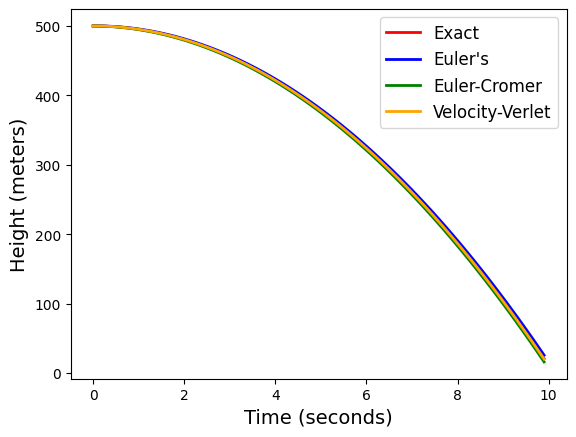

In [7]:
# Compare the results from the numerical differential equation solvers
# to the exact solution graphically.
plt.plot(t,y_exact,linewidth=2,color='red',label="Exact")
plt.plot(t,y_euler,linewidth=2,color='blue',label="Euler's")
plt.plot(t,y_ec,linewidth=2,color='green',label="Euler-Cromer")
plt.plot(t,y_vv,linewidth=2,color='orange',label='Velocity-Verlet')
plt.legend(fontsize=12)
plt.xlabel("Time (seconds)",fontsize=14)
plt.ylabel("Height (meters)",fontsize=14)

**EXERCISE 2**: Based on the graph above, which numerical method seems to match the exact position best?

Delete this text and type your answer here.

### Numerical Analysis of Results

Since comparing results graphically is only an approximate answer, we want to be able to numerically compare our results and see which numerical method is the most accurate.  To determine numerical accuracy we will be using a metric known as root-mean squared error, which is defined as:

$$RMSE(\vec{A},\vec{B}) = \sqrt{\frac{1}{N}\sum_{i=1}^N(A_i - B_i)^2},$$

where $\vec{A}$ and $\vec{B}$ are data sets, each of length N.  RMSE is a measure of the average difference between corresponding points in the data sets.  If $\vec{A} = \vec{B}$ then the RMSE error will be zero.

The function below implements the RMSE equation.

In [8]:
def rmse(A,B):
    """
        Inputs:
            A,B (NumPy arrays)
        Returns:
            Unnamed (a float): the RMSE error between A and B
        Calculates the RMSE error between A and B.
    """
    assert len(A)==len(B),"The data sets must be the same length to calcualte\
        the RMSE."
    return np.sqrt(np.average((A-B)**2)) 

Now, let's calculate the RMSE error between the exact solution and each of the numerical solutions.  

In [9]:
print("RMSE Between Euler's Method and the Exact Solution:", rmse(y_exact,y_euler))
print("RMSE Between Euler-Cromer Method and the Exact Solution:", rmse(y_exact,y_ec))
print("RMSE Between Velocity-Verlet Method and the Exact Solution:", rmse(y_exact,y_vv))

RMSE Between Euler's Method and the Exact Solution: 2.78995480666566
RMSE Between Euler-Cromer Method and the Exact Solution: 2.8107206882532343
RMSE Between Velocity-Verlet Method and the Exact Solution: 0.3026318710261818


**EXERCISE 3**: Knowing that a smaller RMSE means the numerical solution closely matches the exact solution, which numerical method produced the most accurate result?  Does the correlate with what you know about each numerical method?

Delete this text and type your answer here.

**EXERCISE 4**: Increase the value of b (meaning that the magnitude of the drag force increases).  Investigate how this affects the accuracy of the three numerical results.

Delete this text and type your answer here.

## Practice What You Have Learned

**Problem Set-up**: A mass (m=0.25kg) is attached to wall by a spring with a spring constant of k=3000N/m and a relaxed length of 0.1m.  You may assume that air resistance, friction and any other forces besides the spring force can be neglected.
1. Set up an equation that describes the net force acting on the mass.  Using Newton's second law, convert this to an equation for the acceleration of the mass.
2. Convert the acceleration equation from above to a Python expression, using indexing on position or velocities as needed (as shown above).
3. Set up a function that solves the the motion of the spring using Euler's method. It can take any arguments but must return the position of the spring with respect to time.  Assume that the initial position of the mass is 0.2m and it is released from rest.  Use a t$_{final}$ and $\Delta$t that seem reasonable for the problem.
4. Set up a function that solves the the motion of the spring using the Euler-Cromer method. It can take any arguments but must return the position of the spring with respect to time. Assume that the initial position of the mass is 0.2m and it is released from rest. Use the same t$_{final}$ and $\Delta$t as part 3.
5. Set up a function that solves the the motion of the spring using the Velocity-Verlet method. It can take any arguments but must return the position of the spring with respect to time. Assume that the initial position of the mass is 0.2m and it is released from rest. Use the same t$_{final}$ and $\Delta$t as part 3.
6. Calculate an exact expression for the position of the mass.  For the same time values defined in part 3, calculate the exact solution for the motion of the mass.
7. Compare the position of the mass obtained from applying Euler's method, Euler-Cromer method, and the Velocity-Verlet method to the exact position by graphically analyzing the positions and by calculating the appropriate RMSE errors.
8. Investigate the effects of changing the value of $\Delta$t on the accuracy of the numerical methods.  Rerun your code with $\Delta$t=0.1s and $\Delta$t=0.001s and compare to the results you just obtained.